# El algoritmo de Grover

Este notebook implementa el algoritmo de búsqueda de Grover utilizando ProjectQ. El circuito de este algoritmo, que depende de un oráculo, se puede ver en la figura.

<img src="grover.png" widht=50%>

El primer paso es definir una función que recibe el entorno de ejecución, el número de qubits, el oráculo y el número de iteraciones y retorna el elemento encontrado (que puede o no ser el buscado). 


In [2]:
import projectq

from projectq.ops import All, Measure, H, X, Z
from projectq.meta import Control

def grover(eng,n,oracle,it):
    
    # Recibe el entorno de ejecución, el número de qubits, el oráculo y el número de iteraciones
    # Devuelve el elemento medido tras aplicar el algoritmo de Grover
    
    q = eng.allocate_qureg(n)   # Los n qubits de entrada al oráculo
    out = eng.allocate_qubit()  # El qubit de salida del oráculo
    
    All(H) | q
    X | out      # ¡OJO! El estado inicial del qubit de salida del oráculo es |1>
    H | out
    
    # Bucle principal
    
    for _ in range(it):
        
        # Usamos el oráculo
    
        q, out = oracle(eng,n,q,out)  # Llamada al oráculo
    
        # Operador de difusión
        
        All(H) | q
        All(X) | q
        with Control(eng,q[0:n-1]):
            Z | q[n-1]
        All(X) | q
        All(H) | q

    All(Measure) | q
    Measure | out
    
    eng.flush()
    
    return [int(q[i]) for i in range(n)]

Para probarlo, definimos un oráculo correspondiente a una función booleana que sólo devuelve 1 cuando la cadena de entrada está formada toda por unos

In [3]:
def unos(eng,n,q,out):
    
    with Control(eng,q):
        X | out
        
    return q, out

Vamos a comprobar el funcionamiento del algoritmo calculando la probabilidad de encontrar el elemento marcado con distinto número de iteraciones cuando tenemos 5 qubits. 

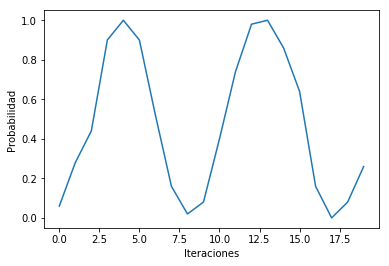

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

max_it = 20
rep = 50
n = 5

iteraciones = range(max_it)
prob = [0.0 for _ in range(max_it)]
buscado = [1 for _ in range(n)]

for it in iteraciones:
    for _ in range(rep): # Repetimos para estimar la probabilidad
        eng = projectq.MainEngine()
        if(grover(eng,n,unos,it)==buscado):
            prob[it]+=1.0/rep

plt.xlabel('Iteraciones')
plt.ylabel('Probabilidad')
plt.plot(iteraciones,prob)
plt.show()

Como se puede observar, para el valor entero más cercano a $\frac{\pi}{4}\sqrt{2^n}$, que en este caso es 4, se obtiene una alta probabilidad de encontrar el elemento marcado.